# Data Visualization Society 2022-Data-Viz-Survey-Challenge

# Admin Setup

In [1]:
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\MarkCichonski


In [3]:
os.chdir('C:/Users/MarkCichonski/Documents/Data Sciene Projects/DVS Challenge')

# Role by Org Type (Q13 and Q18)

In [4]:
df = pd.read_csv('df.csv')

In [5]:
df.head()

,Role,Type,n
0,Analyst,Freelance,20
1,Cartographer,Freelance,1
2,Designer,Freelance,31
3,Developer,Freelance,16
4,Engineer,Freelance,3


In [6]:
outer = df.groupby('Type').sum()

In [7]:
inner = df.groupby(['Type', 'Role']).sum()
inner

n
Type         Role                                        
Freelance    Analyst                                   20
             Cartographer                               1
             Designer                                  31
             Developer                                 16
             Engineer                                   3
             Journalist                                 5
             Leadership (Manager, Director, VP, etc.)   8
             None of these describes my role            6
             Scientist                                  7
             Teacher                                    3
Organization Analyst                                   36
             Cartographer                               1
             Designer                                  11
             Developer                                 10
             Engineer                                   6
             Journalist                                 4
             Leadership (Manager, Director, VP, etc.)  19
             None of these describes my role            6
             Scientist                                  7
             Teacher                                    1

In [8]:
inner_labels = inner.index.get_level_values(1)

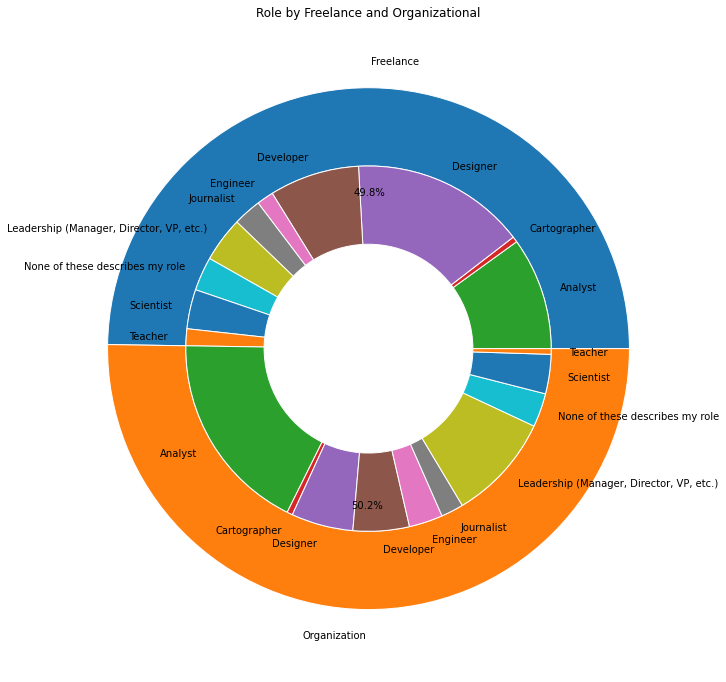

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Role by Freelance and Organizational')
plt.show()

Conclusion: Freelancers seem to be heavier on the Designer role, while organizations seem to be heavier on the Analyst Role.

# Experience by Role (Q6 and Q7)

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [11]:
df2 = pd.read_csv('df2.csv')

In [12]:
df2.head()

,Experience,Role,Avg Exp
0,1,Analyst,1.0
1,1,Analyst,1.0
2,1,Analyst,1.0
3,1,Analyst,1.0
4,1,Analyst,1.0


In [13]:
sns.set(rc = {'figure.figsize':(15,8)})

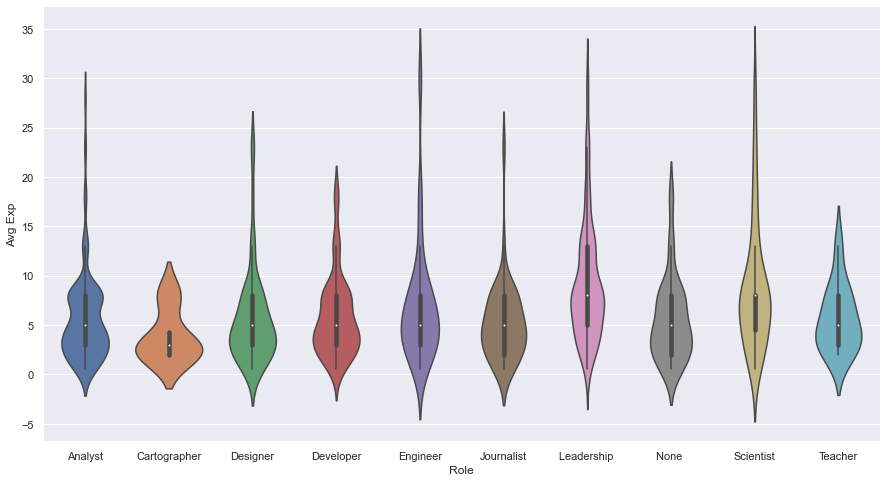

In [14]:
ax = sns.violinplot(x="Role", y="Avg Exp", data=df2)

Conclusion: Analysts, designers, engineers, leaders and scientists have the most experience, ranging above 25 years.  Cartographers and Teachers seem to have the least. Distributions are even with the exeception of leadership.

# Compensation (Q8,Q9,Q10)

In [15]:
df3 = pd.read_csv('df3.csv')

In [16]:
df3.head()

,Currency,Pay,Avg Pay,Role_Full,Role
0,AED - Emirati Dirham,"$40,000 - $59,999",50000.0,Analyst,Analyst
1,ARS - Argentine Peso,"$10,000 - $19,999",15000.0,Analyst,Analyst
2,ARS - Argentine Peso,"$20,000 - $39,999",30000.0,Engineer,Engineer
3,ARS - Argentine Peso,"$20,000 - $39,999",30000.0,Designer,Designer
4,ARS - Argentine Peso,"$20,000 - $39,999",30000.0,"Leadership (Manager, Director, VP, etc.)",Leadership


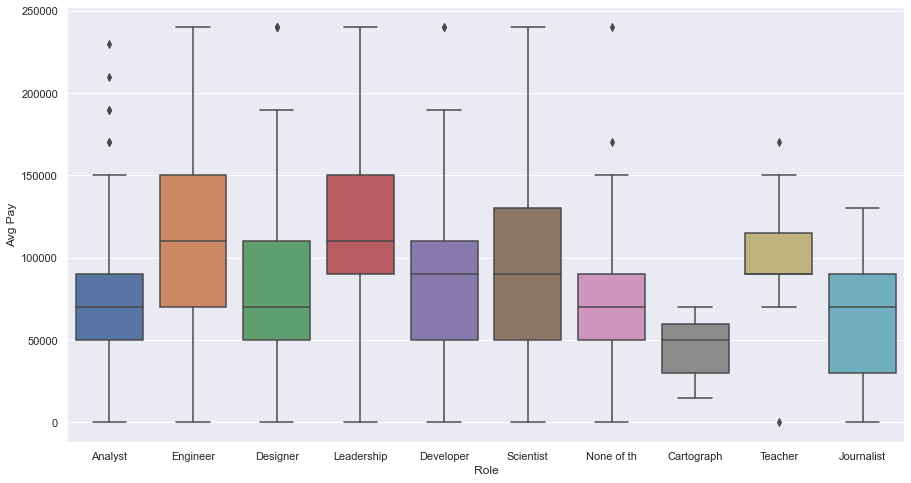

In [17]:
ax = sns.boxplot(x="Role", y="Avg Pay", data=df3)

Median salaries are higher for engineer and leaders.  A second group of salary levels includes analysts, designers, developers, scientists and journalists. Median overall salary is $100,000 yr $USD. Distributions vary widely outside of the 25-75 percentile.

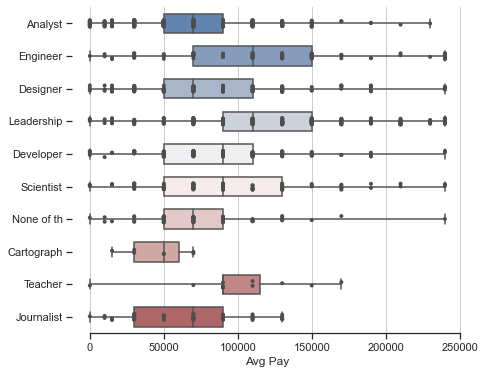

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Avg Pay", y="Role", data=df3,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Avg Pay", y="Role", data=df3,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Additional analysis was conducted to look at where the values of the salaries were across the distribution.  It can be seen here that even on the "whiskers" of these plots, there are consistent groupings of salaries.  We will look later at the relationship between salaries and experience.

In [ ]:
# What industries do the respondents work in? (Q19)

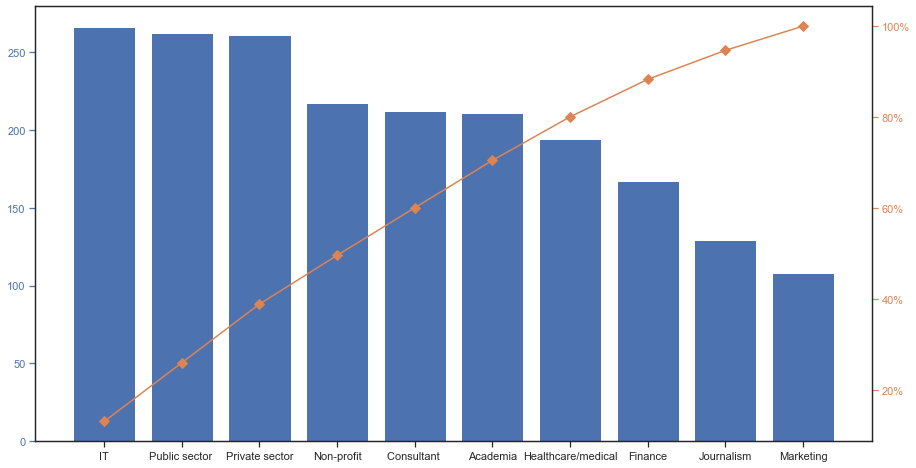

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df4 = pd.read_csv('df4.csv')
df4 = df4.sort_values(by="Count",ascending=False)
df4["cumpercentage"] = df4["Count"].cumsum()/df4["Count"].sum()*100

fig, ax = plt.subplots()
df4=df4.set_index('Industry')
ax.bar(df4.index, df4["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df4.index, df4["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

Conclusion: With 10 categories, 50% of respondents work in the first 4 categories, but they are equally distributed across all the industries addressed.  The drop off starts at finance, with less in journalism and marketing.

# What activities do the respondents spend their time doing? (Q4)

In [20]:
df5 = pd.read_csv('df5.csv')

In [21]:
df5.head()

,Activity,None,5 hours or less,6–10 hours,11–20 hours,21–30 hours,More than 30 hours
0,Data Preparation,341,902,483,279,88,20
1,Data Analysis,278,955,582,221,52,23
2,Data Ideation,467,1055,372,150,31,5
3,Data Visualization,199,871,559,358,119,23
4,Data Other,806,590,228,138,58,39


In [22]:
df5=df5.set_index('Activity')

In [23]:
stacked_data = df5.apply(lambda x: x*100/sum(x), axis=1)

Text(0, 0.5, 'Aspects')

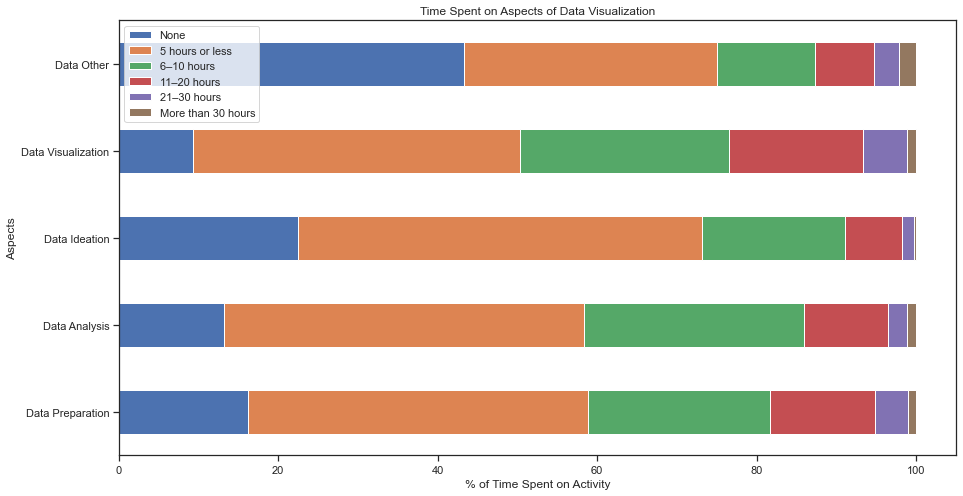

In [24]:
stacked_data.plot(kind="barh", stacked=True)
plt.title("Time Spent on Aspects of Data Visualization")
plt.xlabel("% of Time Spent on Activity")
plt.ylabel("Aspects")

Conclusion: Distributions across the 5 main activities of data visualization are somewhat uniform.  Variations occur in data visualization, where 5-10 hours are more often spent with the largest amount of time overall.  

# Amount of Hours Worked (Q3)

In [25]:
df7 = pd.read_csv('df7.csv')

In [26]:
df7.head()

,Role,TimeWorked,Hours Worked,Role_Short
0,Academic/Teacher,20–29 hours,25.0,Academic/T
1,Academic/Teacher,20–29 hours,25.0,Academic/T
2,Academic/Teacher,20–29 hours,25.0,Academic/T
3,Analyst,20–29 hours,25.0,Analyst
4,Analyst,20–29 hours,25.0,Analyst


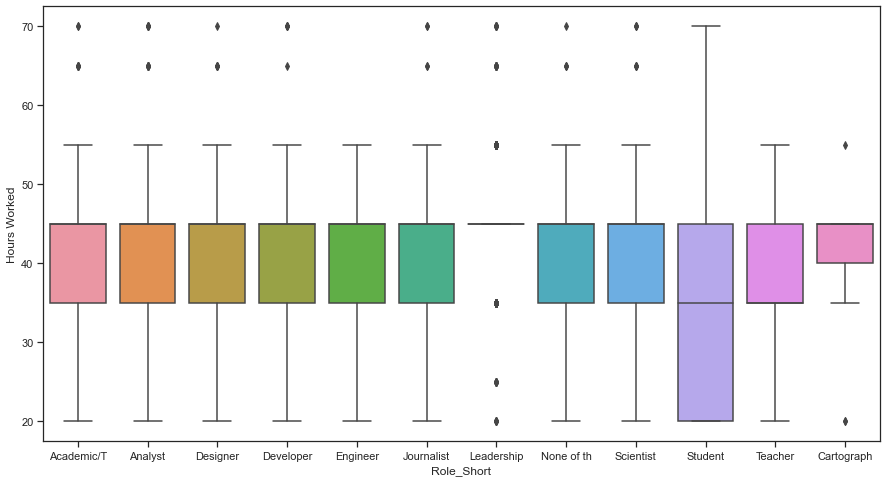

In [27]:
ax = sns.boxplot(x="Role_Short", y="Hours Worked", data=df7)

Conclusion: Due to the responses marked as a range, this perhaps caused the data to show that the hours worked distribution across the majority of the roles was similar, ranging from 20-55 hours, with the majority of time worked between 35-45 hours.  The only major differences were leadership, with a large variation, and the student, with a lower hours worked distribution.

In [ ]:
Tools Used (Q34)

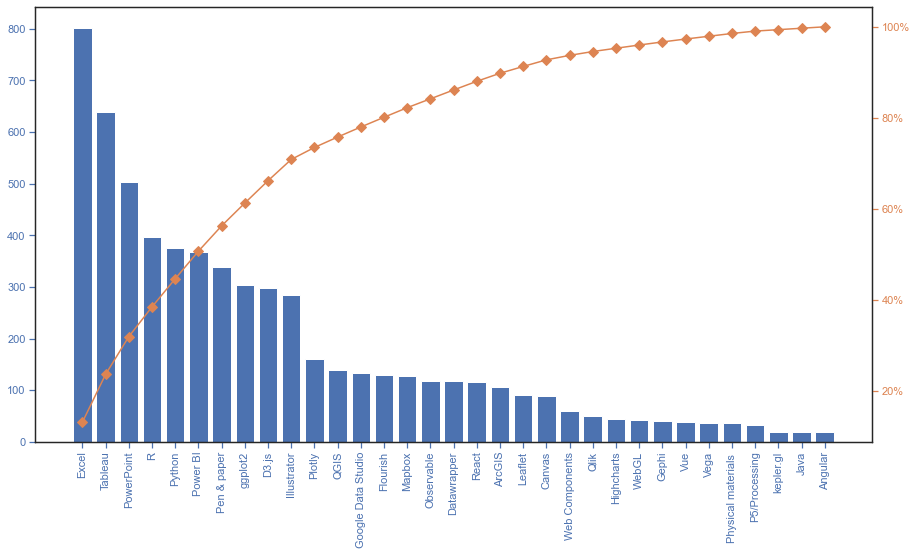

In [28]:
df8 = pd.read_csv('df8.csv')
df8 = df8.sort_values(by="Count",ascending=False)
df8["cumpercentage"] = df8["Count"].cumsum()/df8["Count"].sum()*100

fig, ax = plt.subplots()
df8=df8.set_index('Tool')
ax.bar(df8.index, df8["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df8.index, df8["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", colors="C0", rotation = 90)
ax2.tick_params(axis="y", colors="C1")
plt.show()

Conclusion: 5 tools (Excel, Tableau, PowerPoint, R and Python) make up 50% of the tools used.  Some of the tools lower in the ordering are also part of R or Python.  It was not surprising that: 1. Excel was #1.  Still the primary viz tool in business and 2. Tableau was 2nd.  It is still the most mature BI tool.

# What is the charts most used? (Q35)

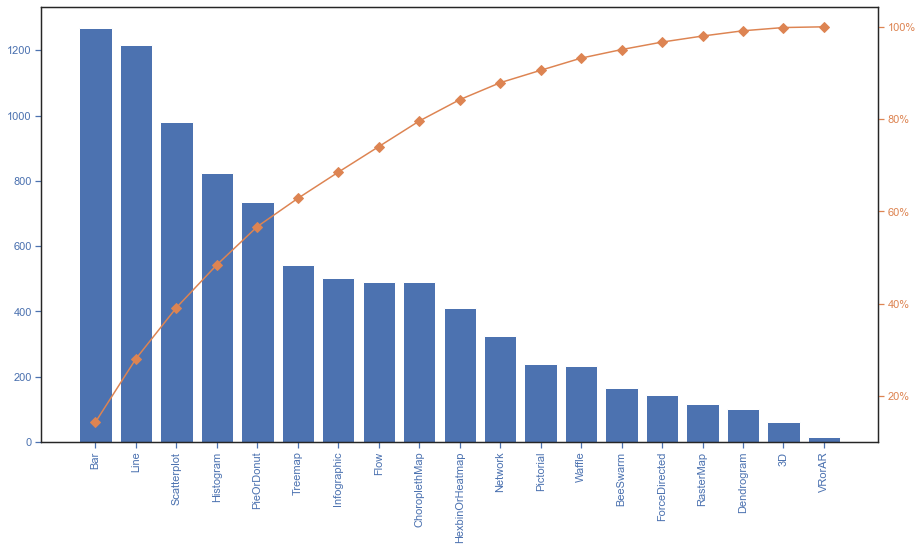

In [29]:
df9 = pd.read_csv('df9.csv')
df9 = df9.sort_values(by="Count",ascending=False)
df9["cumpercentage"] = df9["Count"].cumsum()/df9["Count"].sum()*100

fig, ax = plt.subplots()
df9=df9.set_index('Chart')
ax.bar(df9.index, df9["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df9.index, df9["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", colors="C0", rotation = 90)
ax2.tick_params(axis="y", colors="C1")
plt.show()

Conclusion: 5 charts make up 60% of the top charts used for viz.  No surprise, bar, line, scatter, histogram and pie.  Although this does not speak to quality, it tells us that we are still using the basics.

# How do you communicate your data visualizations? (Q36)

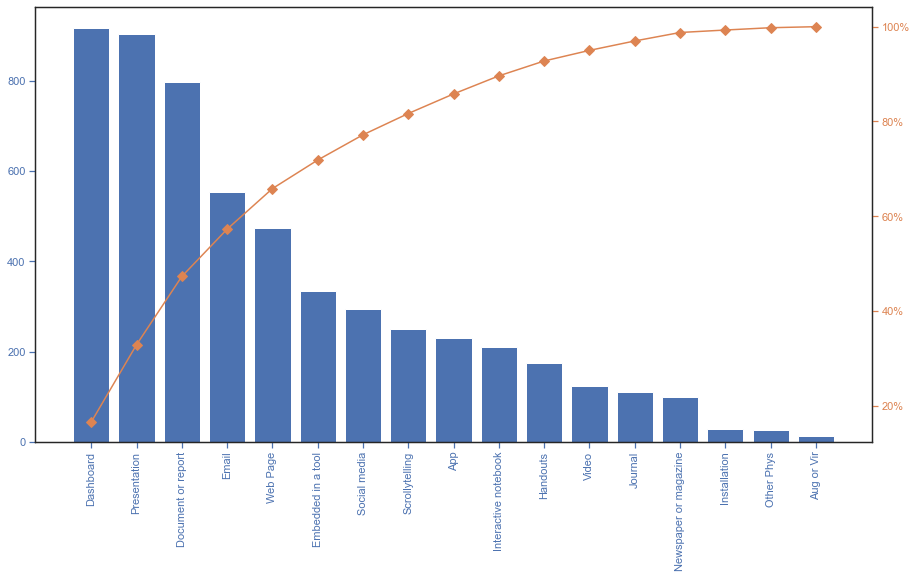

In [30]:
df10 = pd.read_csv('df10.csv')
df10 = df10.sort_values(by="Count",ascending=False)
df10["cumpercentage"] = df10["Count"].cumsum()/df10["Count"].sum()*100

fig, ax = plt.subplots()
df10=df10.set_index('Method')
ax.bar(df10.index, df10["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df10.index, df10["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", colors="C0", rotation = 90)
ax2.tick_params(axis="y", colors="C1")
plt.show()

Conclusion: Only 4 mediums make up over 60% of communication methods.  No surprises here.  This is an area that could be greatly explored to improve not only the medium, but the method and quality of the message.

In [31]:
df11 = pd.read_csv('df11.csv')

In [35]:
df11

,Audience,Count
0,Public,534
1,Analysts,632
2,Engineers,236
3,Scientists,240
4,Medical,159
5,ProdProjManagers,624
6,PolicyMakers,411
7,Execs,854
8,Designers,121
9,Researchers,381


<AxesSubplot:ylabel='Count'>

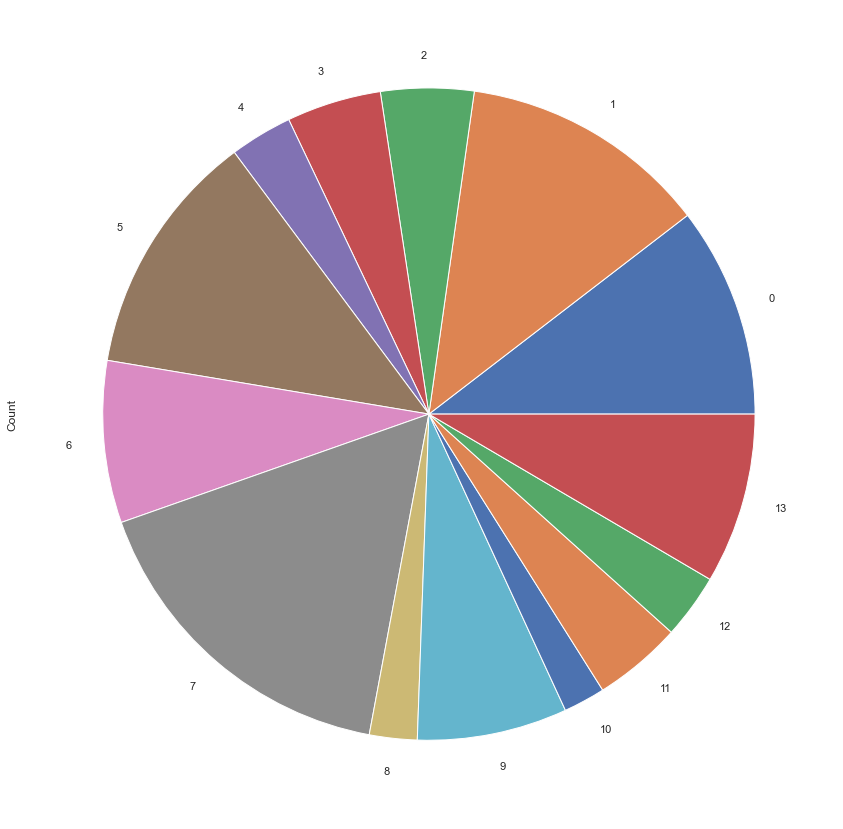

In [33]:
df11.plot.pie(y="Count", legend=False, figsize=(15,15))

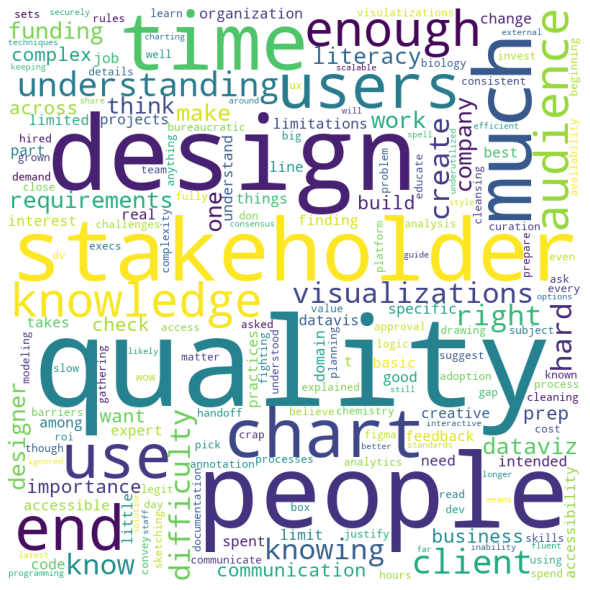

In [38]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv('df12.csv')
 
comment_words = ''
#stopwords = set(STOPWORDS)
stop_words = ["lack", "visualization", "viz", "data", "tool", "vis", "low","tools"] + list(STOPWORDS)
 
# iterate through the csv file
for val in df.Content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the dataset
df13 = pd.read_csv('df13.csv')

# Plot Years DVE Experience across pay
g = sns.lmplot(
    data=df13,
    x="YearsDVExperience", y="PayAnnual", hue="RoleAsEmployee",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Years DVE Experience", "Annual Pay ($)")

In [ ]:
# Plot Years DVE Experience across pay
g = sns.lmplot(
    data=df13,
    x="YearsWorkExperience", y="PayAnnual", hue="RoleAsEmployee",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Years Work Experience", "Annual Pay ($)")